# Create a marketing campaign from a product sketch of a Jet Backpack

This notebook contains a code example of using the Gemini API to analyze a a product sketch (in this case, a drawing of a Jet Backpack), create a marketing campaign for it, and output taglines in JSON format.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemini-api-cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Setup

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import google.generativeai as genai
import PIL.Image
from IPython.display import display, Image
import ipywidgets as widgets

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Marketing Campaign
- Product Name
- Description
- Feature List / Descriptions
- H1
- H2


In [ ]:
model = genai.GenerativeModel(model_name='gemini-pro-vision')

# Analyze Product Sketch

In [ ]:
productSketchUrl = "https://i.ibb.co/fG8HM71/jetpack.png"
!curl -o jetpack.jpg {productSketchUrl}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1531k  100 1531k    0     0  4933k      0 --:--:-- --:--:-- --:--:-- 4939k


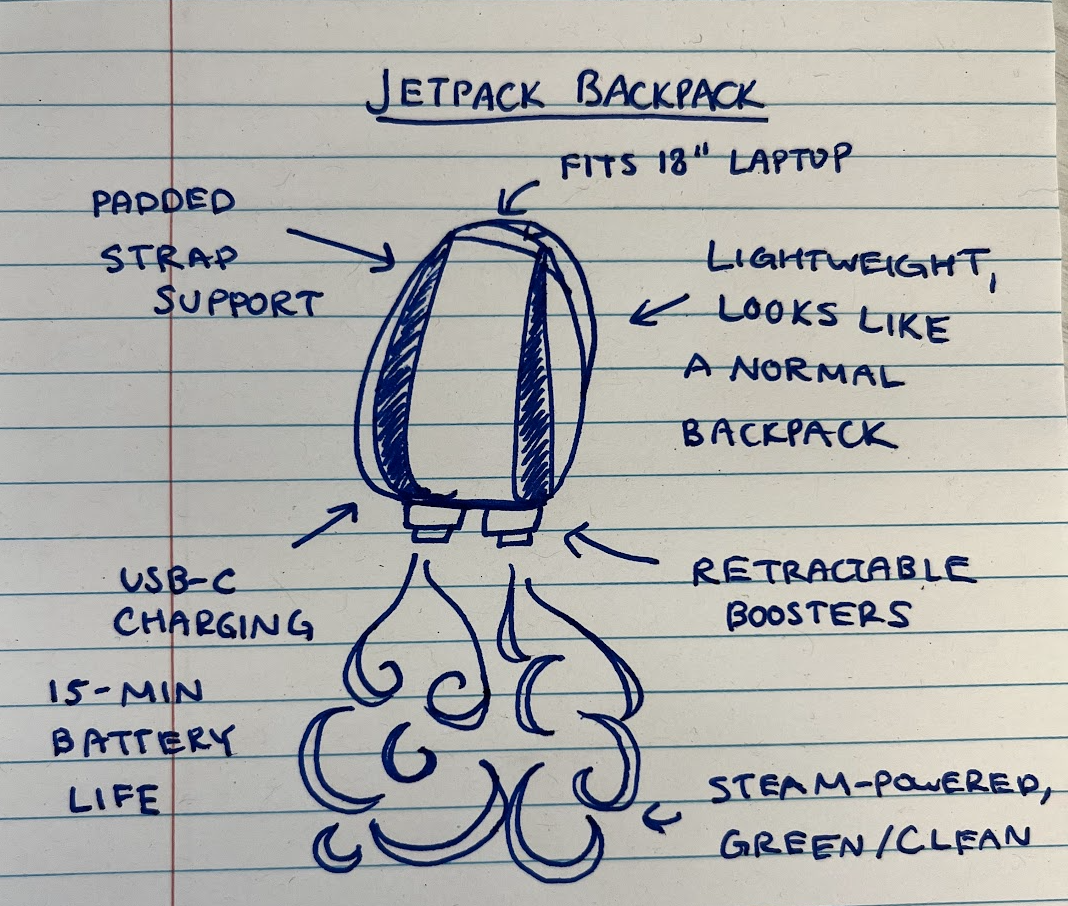

In [ ]:
img = PIL.Image.open('jetpack.jpg')
display(Image('jetpack.jpg', width=300))

In [ ]:
analyzePrompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3]}"""

In [ ]:
response = model.generate_content([analyzePrompt, img])

In [ ]:
productInfo = eval(response.text)
print(productInfo)

{'description': 'The Jetpack Backpack is a lightweight backpack that looks like a normal backpack but has retractable boosters that can be used to fly. It has a 15-minute battery life and can carry a laptop up to 18 inches. The backpack also has a USB-C charging port and padded shoulder straps.', 'features': ['Retractable boosters', '15-minute battery life', 'USB-C charging port', 'Padded shoulder straps', 'Fits 18-inch laptop', 'Lightweight', 'Looks like a normal backpack', 'Steam-powered', 'Green/clean']}


In [ ]:
namePrompt = """You are a marketing whiz and writer trying to come up with a name for the
product shown in the image. Come up with ten varied, interesting possible names. Return the result
in array format, like this: ['name 1', 'name 2', ...]. Pay careful attention
to return a valid array in the format described above, and no other text.
The most important thing is that you stick to the array format."""

response = model.generate_content([namePrompt, img])

names = eval(response.text)
# Create a Dropdown widget to choose a name from the
# returned possible names
dropdown = widgets.Dropdown(
    options=names,
    value=names[0],  # default value
    description='Name:',
    disabled=False,
)
display(dropdown)

Dropdown(description='Name:', options=('Jetpack', 'Skypack', 'Zoompack', 'Boostpack', 'Liftoff', 'Ascend', 'Pr…

In [ ]:
name = dropdown.value

In [ ]:
websiteCopyPrompt = """You're a marketing whiz and expert copywriter. You're writing
website copy for a product named {productName}. Your first job is to come up with H1
H2 copy. These are brief, pithy sentences or phrases that are the first and second
things the customer sees when they land on the splash page. Here are some examples:
{{
  "h1": "We canned a feeling",
  "h2": "drinks and powders to help you feel calm cool and collected\
   despite the stressful world around you"
}}
{{
  "h1": "Design. Publish. Done.",
  "h2": "Stop rebuilding your designs from scratch. In Framer, everything\
   you put on the canvas is ready to be published to the web."
}}

Create the same json output for a product named "{productName}" with description\
 "{description}".
Output ten different options as json in an array.
""".format(productName=name, description=productInfo['description'])

In [ ]:
copyResponse = model.generate_content([websiteCopyPrompt, img])

In [ ]:
copy = eval(copyResponse.text)

In [ ]:
copy

[{'h1': 'The Jetpack Backpack', 'h2': 'The backpack that lets you fly'},
 {'h1': 'Fly like a bird',
  'h2': 'With the Jetpack Backpack, you can finally achieve your dream of flying'},
 {'h1': 'The future is here',
  'h2': 'The Jetpack Backpack is the most advanced piece of technology ever created'},
 {'h1': 'Change the way you travel',
  'h2': 'With the Jetpack Backpack, you can travel anywhere you want, whenever you want'},
 {'h1': 'The possibilities are endless',
  'h2': 'With the Jetpack Backpack, you can do anything you can imagine'},
 {'h1': 'Be the envy of all your friends',
  'h2': "With the Jetpack Backpack, you'll be the coolest person around"},
 {'h1': 'Make your dreams come true',
  'h2': 'With the Jetpack Backpack, you can finally achieve your dreams'},
 {'h1': "The sky's the limit",
  'h2': 'With the Jetpack Backpack, you can reach new heights'},
 {'h1': 'Fly high',
  'h2': 'With the Jetpack Backpack, you can soar through the sky'},
 {'h1': 'The world is yours',
  'h2': 'W

In [ ]:
h1 = "Reach new heights"
h2 = "With Nimbus, the sky's the limit. Explore new heights and see the world from a whole new perspective."

In [ ]:
htmlPrompt = """Generate HTML and CSS for a splash page for a new product called {productName}.
Output only HTML and CSS and do not link to any external resources.
Include the top level title: "{h1}" with the subtitle: "{h2}".
""".format(productName=name, h1=h1, h2=h2)

In [ ]:
# switch the model to gemini-pro as we're no longer using images
model = genai.GenerativeModel(model_name='gemini-pro')

In [ ]:
html = model.generate_content([htmlPrompt])